In [1]:
# New Features
# Preprocessing: Scaling was done, dummy variables done
# Best Features

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('Solarize_Light2')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# use original data and not dummy for decisionmaking
df = pd.read_csv('data_new.csv')
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsivity,Sensations,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,(35-44),female,Professional,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Last Week,In last Decade,Never,In last Decade,Last Day,Never,Last Week,Never,Never,Never,Never,Never,Never,Never,Never,Never,In last Decade,Never,Never
1,(25-34),male,PHD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Last Week,In last Decade,In last Decade,Never,Last Day,Last Month,Last Day,Last Year,Never,Last Month,Never,In last Decade,Never,In last Decade,Last Year,Never,Last Month,Never,Never
2,(35-44),male,Professional,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Last Day,Never,Never,Never,Last Day,Last Year,Last Month,Never,Never,Never,Never,Never,Never,Never,Never,Over Decade ago,Never,Never,Never
3,(18-24),female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Last Month,Never,Never,Last Year,Last Week,In last Decade,Last Month,In last Decade,Never,Never,Never,In last Decade,Never,Never,Never,Never,In last Decade,Never,Never
4,(35-44),female,PHD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Last Month,Over Decade ago,Over Decade ago,Never,Last Day,Last Year,Last Day,Never,Never,Over Decade ago,Never,Never,Over Decade ago,Never,Never,In last Decade,In last Decade,Never,Never


### Decision for what to Predict and Task
- Prediction of Cannabis Use 
- Task: Binary Classification, Cannabis yes:1

Can the characteristics of a person predict the propensity to cannabis use?

In [4]:
# Categorize drugs in soft and hard drugs (low vs high risk drug)
# UK Classification because most Instances from here
# https://en.wikipedia.org/wiki/Drugs_controlled_by_the_UK_Misuse_of_Drugs_Act
# can't be used, because Alc is not classified here


# next try: forget it. A lot of disagreement in scientific community about
# harmfulness of drugs. Will instead concentrate on predicting 
# vulnerability of person to Cannabis (because most used of illegal drugs)
# BINARY PROBLEM CANNABIS NO OR YES
# which are best predictors for smoking mj

In [5]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine', 'Semer', 'VSA']

In [6]:
for i in drugs:
    a = df[(df[i] == 'Last Day') | (df[i] == 'Last Week')].shape[0]
    print(i.upper(),a)

ALCOHOL 1261
AMPHET 162
AMYL 17
BENZOS 179
CAFF 1651
CANNABIS 643
CHOC 1485
COKE 59
CRACK 11
ECSTASY 84
HEROIN 29
KETAMINE 37
LEGALH 131
LSD 67
METH 121
SHROOMS 42
NICOTINE 763
SEMER 0
VSA 21


In [7]:
df.Cannabis.value_counts()

Last Day           458
Never              413
In last Decade     266
Last Year          210
Over Decade ago    207
Last Week          185
Last Month         138
Name: Cannabis, dtype: int64

### Interesting Associations with Cannabis Use

In [8]:
op = df.groupby('Cannabis')['Openness'].mean().sort_values()
op

Cannabis
Never             -0.578910
Over Decade ago   -0.338861
In last Decade    -0.208690
Last Year          0.112941
Last Month         0.273030
Last Week          0.431747
Last Day           0.474729
Name: Openness, dtype: float64

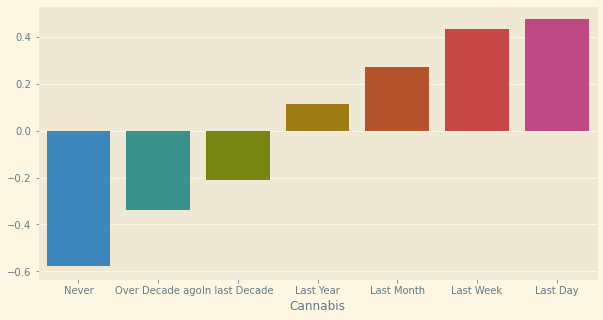

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = op.index, y = op.values);

In [10]:
con = df.groupby('Cannabis')['Conscientiousness'].mean().sort_values()
con

Cannabis
Last Month        -0.337117
Last Day          -0.264263
Last Year         -0.259023
Last Week         -0.220525
In last Decade     0.082980
Over Decade ago    0.262057
Never              0.449609
Name: Conscientiousness, dtype: float64

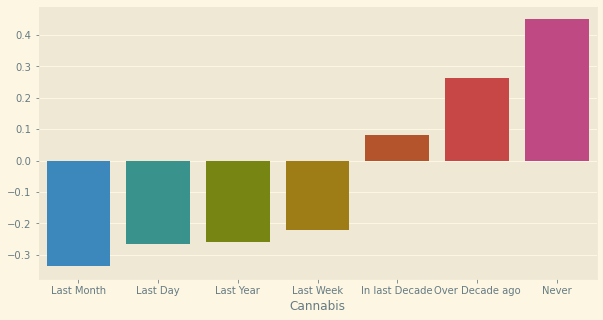

In [11]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = con.index, y = con.values);

In [12]:
ex = df.groupby('Cannabis')['Extraversion'].mean().sort_values()
ex

Cannabis
Last Year         -0.148580
In last Decade    -0.050416
Last Month        -0.038537
Over Decade ago   -0.017109
Last Day           0.013548
Last Week          0.031867
Never              0.091305
Name: Extraversion, dtype: float64

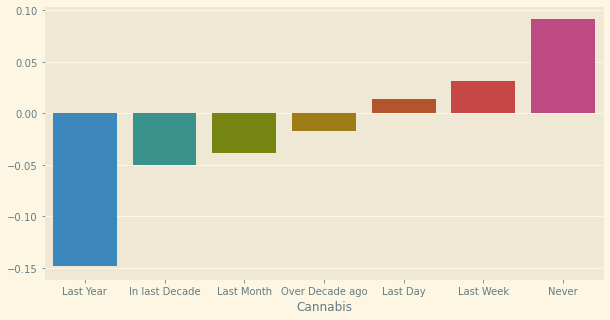

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = ex.index, y = ex.values);

In [14]:
ag = df.groupby('Cannabis')['Agreeableness'].mean().sort_values()
ag

Cannabis
Last Month        -0.172176
Last Day          -0.166587
In last Decade    -0.101935
Last Year         -0.095578
Last Week         -0.010404
Over Decade ago    0.175495
Never              0.270235
Name: Agreeableness, dtype: float64

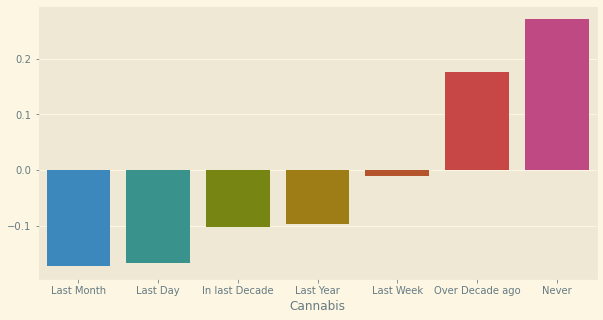

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = ag.index, y = ag.values);

In [16]:
neu = df.groupby('Cannabis')['Neuroticism'].mean().sort_values()
neu

Cannabis
Over Decade ago   -0.226005
Never             -0.185463
Last Day           0.046846
Last Week          0.057619
In last Decade     0.079920
Last Month         0.119779
Last Year          0.249719
Name: Neuroticism, dtype: float64

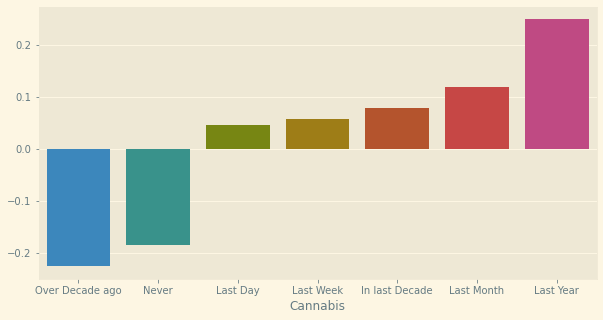

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = neu.index, y = neu.values);

In [18]:
imp = df.groupby('Cannabis')['Impulsivity'].mean().sort_values()
imp

Cannabis
Never             -0.448334
Over Decade ago   -0.289148
In last Decade    -0.044760
Last Year          0.120732
Last Week          0.248180
Last Day           0.314188
Last Month         0.374583
Name: Impulsivity, dtype: float64

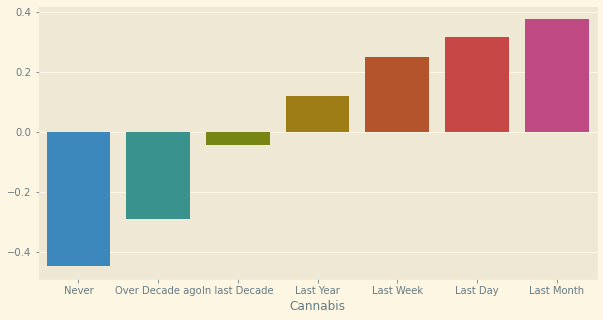

In [19]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = imp.index, y = imp.values);

In [20]:
sens = df.groupby('Cannabis')['Sensations'].mean().sort_values()
sens

Cannabis
Never             -0.652989
Over Decade ago   -0.396211
In last Decade    -0.205113
Last Year          0.202186
Last Month         0.428169
Last Day           0.450558
Last Week          0.456507
Name: Sensations, dtype: float64

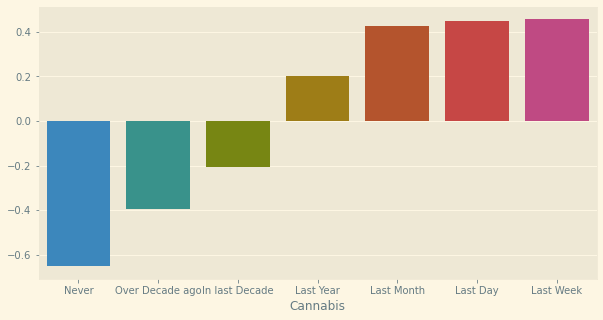

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = sens.index, y = sens.values);

#### Good Predictors
- Opennes to new Experiences
- Conscientiousness
- Impulsivity
- Sensations

#### Not very good
- Extraversion
- Agreeableness
- Neuroticism

### Change values for Cannabis Use to differentiate between current/recent users and others

In [22]:
# is stoner if smoked, last day, last week or last month, else 0
def newcol(row):
    if row['Cannabis'] == 'Last Day' or row['Cannabis'] == 'Last Week' or row['Cannabis'] == 'Last Month':
        val = 1
    else:
        val = 0
    return val   

In [23]:
df['can'] = df.apply(newcol, axis=1)

In [24]:
# Sanity check
df.can.value_counts()

0    1096
1     781
Name: can, dtype: int64

In [25]:
# Classes are balanced well enough

In [26]:
# no double information in dataset
df = df.drop('Cannabis', axis=1)

In [27]:
gen = df.groupby('can')['Gender'].value_counts().sort_values()
gen

can  Gender
1    female    260
0    male      419
1    male      521
0    female    677
Name: Gender, dtype: int64

In [28]:
gen.index[0][0]

1

In [29]:
# Only makes sense if normalized
#eth = df.groupby('can')['Ethnicity'].value_counts().sort_values()
#eth

In [30]:
# Only makes sense if normalized
#co = df.groupby('can')['Country'].value_counts().sort_values()
#co

### Vis Cann and Neuro

In [31]:
df.groupby('can')['Neuroticism'].mean()

can
0   -0.045328
1    0.062285
Name: Neuroticism, dtype: float64

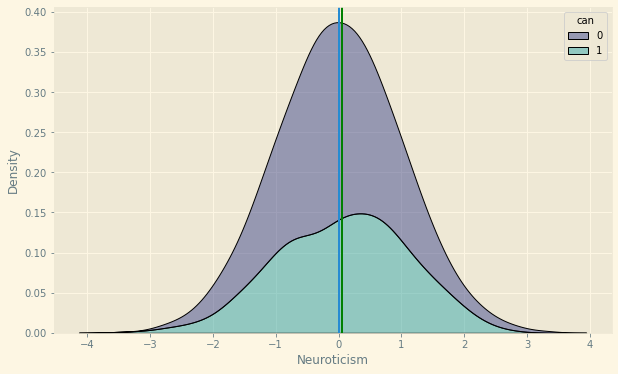

In [32]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.kdeplot(data=df, x="Neuroticism", hue='can', 
            palette="mako", fill=True, multiple="stack", alpha=.5);

plt.axvline(df.Neuroticism.mean());
plt.axvline(0.062285, color='green');

### Prep Dataset for Correlation Analysis

In [33]:
# dummy
df_d = pd.get_dummies(df, drop_first=True)

### Correlations with Cannabis

In [34]:
abs(df_d.corrwith(df.can)).sort_values(ascending=False)

can                            1.000000
Legalh_Never                   0.515748
Country_UK                     0.503407
Shrooms_Never                  0.442763
Country_USA                    0.431344
Ecstasy_Never                  0.426196
Sensations                     0.399704
LSD_Never                      0.399038
Openness                       0.366461
Education_Undergrad            0.343377
Shrooms_Last Year              0.343356
Amphet_Never                   0.339306
Coke_Never                     0.334865
Legalh_Last Year               0.331371
LSD_Last Year                  0.287521
Nicotine_Never                 0.283603
Ecstasy_Last Year              0.282964
Gender_male                    0.280755
Meth_Never                     0.276623
Nicotine_Last Day              0.275971
Impulsivity                    0.268964
Ecstasy_Last Month             0.259634
Ketamine_Never                 0.259036
Amphet_Last Year               0.252524
Shrooms_Last Month             0.246931


In [35]:
best = abs(df_d.corrwith(df.can)).sort_values(ascending=False).head(10)
b = list(best.index)

In [36]:
best_df = df_d[b]

In [37]:
best_corr = best_df.corr()
best_corr

,can,Legalh_Never,Country_UK,Shrooms_Never,Country_USA,Ecstasy_Never,Sensations,LSD_Never,Openness,Education_Undergrad
can,1.000000,-0.515748,-0.503407,-0.442763,0.431344,-0.426196,0.399704,-0.399038,0.366461,0.343377
Legalh_Never,-0.515748,1.000000,0.410051,0.479404,-0.376067,0.519502,-0.427152,0.414624,-0.350626,-0.308812
Country_UK,-0.503407,0.410051,1.000000,0.405357,-0.721659,0.315747,-0.334435,0.442700,-0.321741,-0.379562
Shrooms_Never,-0.442763,0.479404,0.405357,1.000000,-0.347297,0.538276,-0.351499,0.647848,-0.339604,-0.200272
Country_USA,0.431344,-0.376067,-0.721659,-0.347297,1.000000,-0.266400,0.287753,-0.361053,0.293086,0.386554
Ecstasy_Never,-0.426196,0.519502,0.315747,0.538276,-0.266400,1.000000,-0.366736,0.553173,-0.284835,-0.213332
Sensations,0.399704,-0.427152,-0.334435,-0.351499,0.287753,-0.366736,1.000000,-0.341091,0.419486,0.235109
LSD_Never,-0.399038,0.414624,0.442700,0.647848,-0.361053,0.553173,-0.341091,1.000000,-0.330371,-0.190636
Openness,0.366461,-0.350626,-0.321741,-0.339604,0.293086,-0.284835,0.419486,-0.330371,1.000000,0.188850
Education_Undergrad,0.343377,-0.308812,-0.379562,-0.200272,0.386554,-0.213332,0.235109,-0.190636,0.188850,1.000000


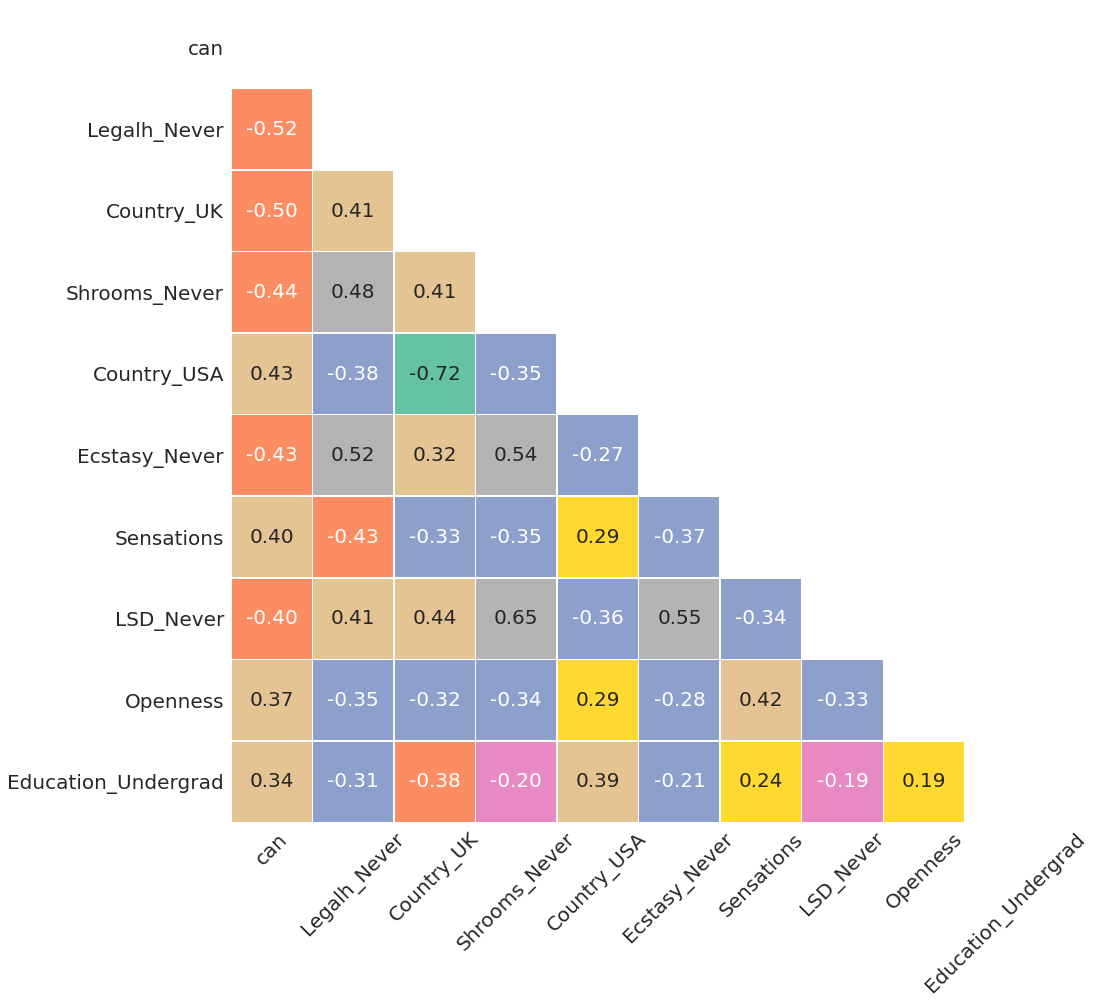

In [38]:
mask = np.zeros_like(best_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(best_corr, mask=mask,  annot = True, annot_kws={'size': 20},  fmt = '.2f', 
            cmap= 'Set2', cbar=False, linewidths=.5, square=True)
#plt.yticks(rotation=0) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 20);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 20);

- Never is stronger than the other times of usage, which means, could aggregate all to drug:y/n


### New Features
- Polynomial Features were tried with Support Vector Classifier Kernel
- 

In [39]:
# new Variable T-Score (Psychometrics)
# T = (Z x 10) + 50

In [40]:
# Klassen doch mal ausgleichen

In [41]:
# save data can
df_d.to_csv('data_can.csv', sep=',', encoding='utf-8', index=False)

# save balanced dataset
